# Visualizing hypergraphs
As for pairwise networks, visualizing hypergraphs is surely a hard task and no algorithm can exaustively work for any given input structure. Here we show how to visualize some toy structures using the visualization function contained in the ```drawing``` module that heavily relies on [networkx](https://networkx.org/documentation/stable/reference/drawing.html) and [matplotlib](https://matplotlib.org/).

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import xgi

Les us first create a small toy hypergraph containing edges of different sizes.

In [107]:
H = xgi.Hypergraph()
H.add_edges_from([[1,2,3],[3,4,5],[3,6],[6,7,8,9],[1,4,10,11,12],[1,4]])

The first step for drawing a hypergraph consists in choosing a layout for the nodes.
At the moment the three available layouts are:
* ```random_layout```: to position nodes uniformly at random in the unit square ([exactly as networkx](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.random_layout.html)).
* ```pairwise_spring_layout```: to position the nodes using the Fruchterman-Reingold force-directed algorithm on the projected graph. In this case the hypergraph is first projected into a graph (1-skeleton) using the ```xgi.convert_to_graph(H)``` function and then networkx's [spring_layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) is applied. 
* ```barycenter_spring_layout```: to position the nodes using the Fruchterman-Reingold force-directed algorithm using an augmented version of the the graph projection of the hypergraph, where _phantom nodes_ (that we call barycenters) are created for each edge of order $d>1$ (composed by more than two nodes). Weights are then assigned to all hyperedges of order 1 (links) and to all connections to phantom nodes within each hyperedge to keep them together. Weights scale with the size of the hyperedges. Finally, the weighted version of networkx's [spring_layout](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) is applied.
* ```weighted_barycenter_spring_layout```: same as ```barycenter_spring_layout``, but here the weighted version of the Fruchterman-Reingold force-directed algorithm is used. Weights are assigned to all hyperedges of order 1 (links) and
    to all connections to phantom nodes within each hyperedge to keep them together. Weights scale with the order of the group interaction.
    
Each layout returns a dictionary that maps nodes ID into (x, y) coordinates.

In [95]:
pos = xgi.barycenter_spring_layout(H)

We can now pas the ```pos``` dictionaty to the ```drawing``` function:

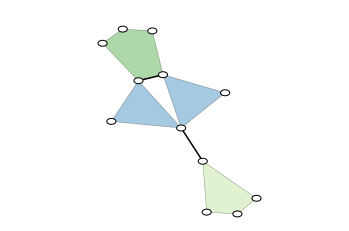

In [96]:
xgi.draw(H, pos)

**Colors of the hyperedges** are designed to match the hyperedge size. Both sequential and qualitative [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) can be passed as an argument. Sequential colormaps would simply be discretized according to the sizes of the provided hypergraph:

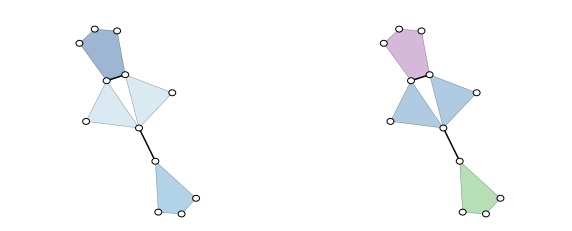

In [127]:
plt.figure(figsize=(10,4))

#Sequential colormap
cmap = plt.cm.Blues

ax = plt.subplot(1,2,1)
xgi.draw(H, pos, cmap=cmap, ax=ax)

#Qualitative colormap
cmap = plt.cm.Set1

ax = plt.subplot(1,2,2)
xgi.draw(H, pos, cmap=cmap, ax=ax)

Some other parameters can be tweaked as well:

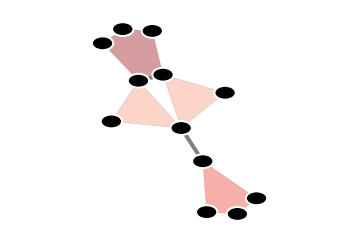

In [137]:
cmap = plt.cm.Reds
edge_lc = 'gray'
edge_lw = 4
node_fc = 'black'
node_ec = 'white'
node_lw = 2
node_size = 0.07

xgi.draw(H, pos, cmap=cmap, edge_lc=edge_lc, edge_lw=edge_lw,
         node_fc=node_fc, node_ec=node_ec, node_lw=node_lw, node_size=node_size)

# Visualizing simplicial complexes

Simplicial complexes can be visualized using the same functions for node layout and drawing.

### Technical note
By definition, a simplicial complex object contains all sub-simplices. This would make the visualization heavy since all sub-simplices contained in a maximal simplex would overlap. The automatic solution for this, implemented by default in all the layouts, is to convert the simplicial complex into a hypergraph composed by solely by its maximal simplices.

### Visual note
To visually distinguish simplicial complexes from hypergraphs, the ```draw``` function will also show all links contained in each maximal simplices (while omitting simplices of intermetiate orders). 

In [54]:
SC = xgi.SimplicialComplex()
SC.add_simplices_from([[3,4,5],[3,6],[6,7,8,9],[1,4,10,11,12],[1,4]])

In [55]:
pos = xgi.pairwise_spring_layout(SC)

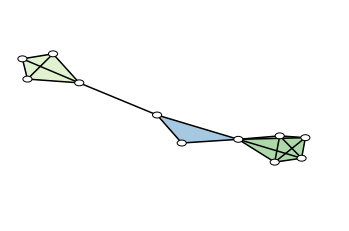

In [56]:
xgi.draw(SC, pos)

## Degree
The simplest definition, that is the number of hyperedges (of any size) incident on a node.

In [57]:
H = xgi.Hypergraph()
H.add_edges_from([[1,2,3],[3,4,5],[3,6],[6,7,8,9],[1,4,10,11,12],[1,4]])

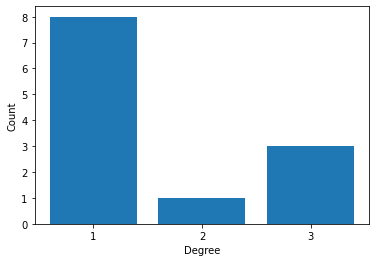

In [58]:
centers, heights = xgi.degree_histogram(H)

plt.bar(centers, heights)
plt.ylabel('Count')
plt.xlabel('Degree')
plt.xticks(np.arange(1, max(centers)+1, step=1));